<a href="https://colab.research.google.com/github/devarshi167/Cardiovascular-Risk-Prediction-MLC/blob/main/Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Cardiovascular Risk Prediction



### **Project Type**    - ML Classification




#### **Contribution**    - Team

##### **Team Member 1** -Devarshi Dwivedi
##### **Team Member 2** -Jay Pardeshi
##### **Team Member 3** -Priyadarshini Gaikwad
##### **Team Member 4** -Samarjeet singh
##### **Team Member** 5 -Anas 

## **Problem Statement Given**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes. 

### **Variables**


Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

## **Data Description**

### **Demographic:**
• Sex: male or female("M" or "F")

• Age: Age of the patient

### **Behavioral:**
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.


### **Medical( history):**
• BP Meds: whether or not the patient was on blood pressure medication 

• Prevalent Stroke: whether or not the patient had previously had a stroke 

• Prevalent Hyp: whether or not the patient was hypertensive 

• Diabetes: whether or not the patient had diabetes 


### **Medical(current):**
• Tot Chol: total cholesterol level

• Sys BP: systolic blood pressure

• Dia BP: diastolic blood pressure 

• BMI: Body Mass Index 

• Heart Rate: heart rate 

• Glucose: glucose level 


### **Predict variable (desired target)**
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Project Description -**

Heart disease is the major cause of morbidity and mortality globally: it
accounts for more deaths annually than any other cause. According to the
WHO, an estimated 17.9 million people died from heart disease in 2016,
representing 31% of all global deaths. Over three quarters of these deaths
took place in low- and middle-income countries.

Of all heart diseases, coronary heart disease is by far
the most common and the most fatal. In the United States, for example, it
is estimated that someone has a heart attack every 40 seconds and about
805,000 Americans have a heart attack every year (CDC 2019).

Doctors and scientists alike have turned to machine learning (ML)
techniques to develop screening tools and this is because of their
superiority in pattern recognition and classification as compared to other
traditional statistical approaches.

In this project, We will be giving a walk through on the development
of a screening tool for predicting whether a patient has a 10-year risk of
developing coronary heart disease(CHD) using different Machine Learning
techniques.

# **GitHub Link -**

## **Dataset Overview**

### Import Libraries

In [ ]:
#Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

### Dataset Loading

In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset

path = '/content/drive/MyDrive/Cardiovascular Risk Prediction ML classification Devarshi Dwivedi/data_cardiovascular_risk.csv'

In [ ]:
df = pd.read_csv(path , index_col = "id")

### Dataset First View

In [ ]:
# first 5 entries

df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# last 5 entries

df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [ ]:
# Dataset Columns 

df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Dataset Information

In [ ]:
# detailed description of our dataset.

df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


## **Data Cleaning**

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# duplicates any ?
len(df[df.duplicated()])

0

NO Duplicates

#### Missing Values/Null Values

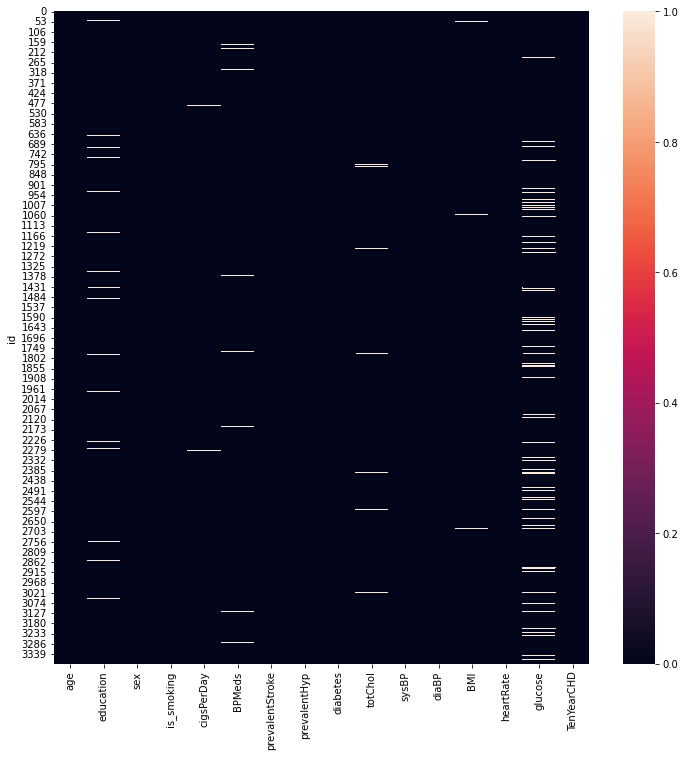

In [ ]:
# Missing Values/Null Values 

# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [ ]:
# count of missing/null values 

df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

NULL values are present in - 'glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate'.

In [ ]:
# filling the null values with median and mode for numeric and categorical columns respectively

df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
# cheching the null values in our dataset

df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## 3. ***Data Wrangling***

In [ ]:
# making dataset analysis ready.

In [ ]:
# One Hot Encoding 

df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
# creating a list with all the numerical features

numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# looking at the unique values of each column in categorical columns

for feature in categorical_columns:
    print(feature,':')
    print(df[feature].value_counts())
    print(".............................................")

education :
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
.............................................
sex :
0    1923
1    1467
Name: sex, dtype: int64
.............................................
is_smoking :
0    1703
1    1687
Name: is_smoking, dtype: int64
.............................................
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
.............................................
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
.............................................
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
.............................................
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
.............................................


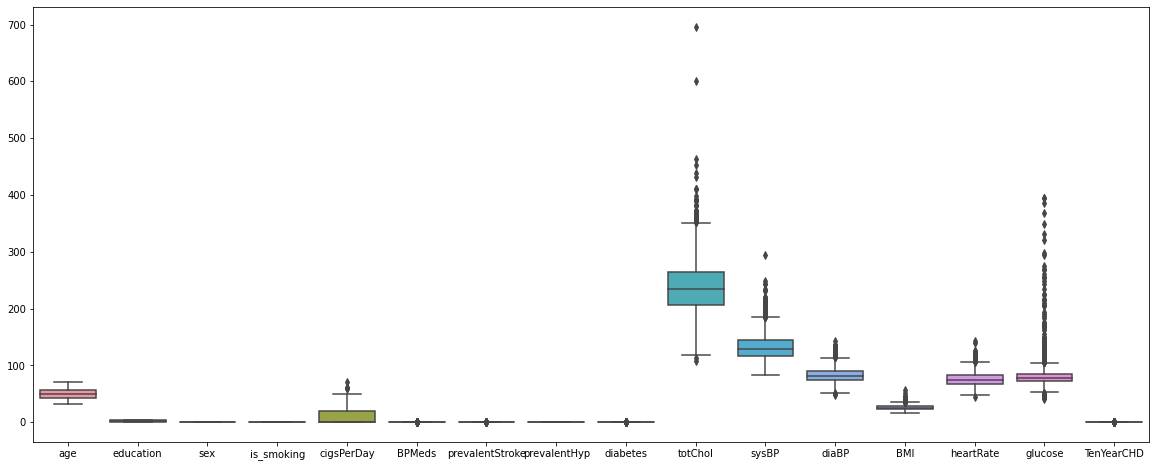

In [ ]:
# checking outliers

plt.figure(figsize=(20,8), facecolor='w')
sns.boxplot(data=df)
plt.show()

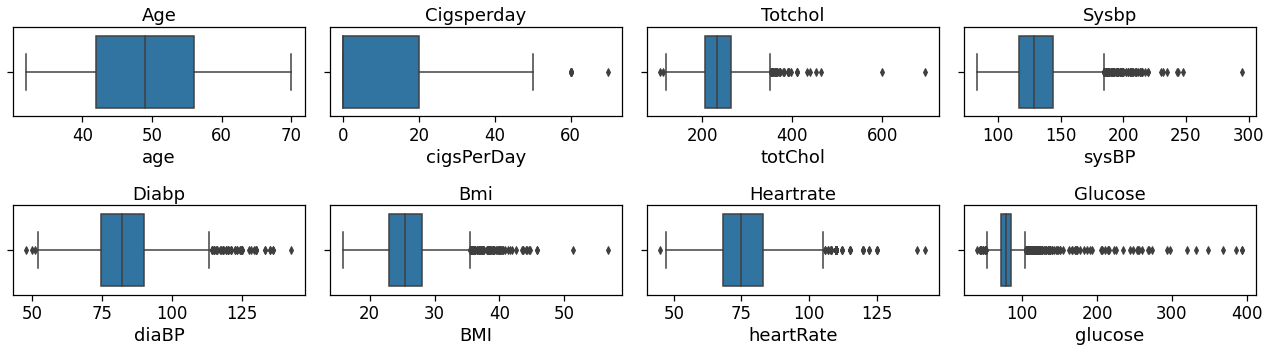

In [ ]:
# Visualization the overall data and the outliers:

plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()


- Outliers are present in totChol, cigsPerDay, diaBP,sysBP,hearRate,glucose.

- Glucose feature has highest number of outliers.

- Outliers are important here.

- There could be a possibility that a person might have high risk of the same and removing it, would make this model defective

In [ ]:
# Handling outliers by standard methods and Plotting graphs:

pk1 = df.copy()
for col in numeric_features:


  # Using IQR method to define the range of inliners:

  q1, q3, median = pk1[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

  # Replacing Outliers with median value:

  pk1[col] = np.where(pk1[col] > upper_limit, median,np.where(
                         pk1[col] < lower_limit,median,pk1[col]))

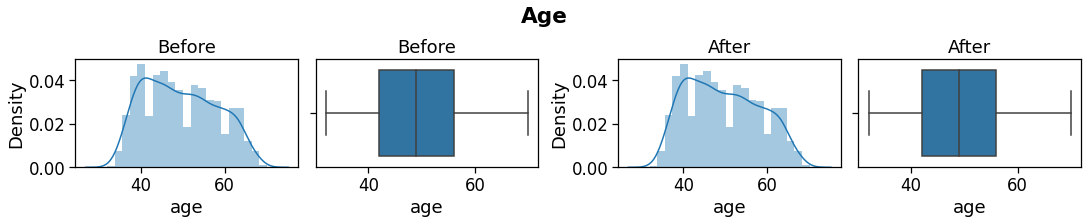

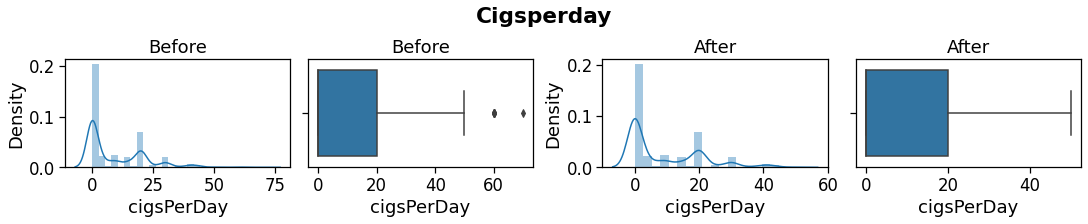

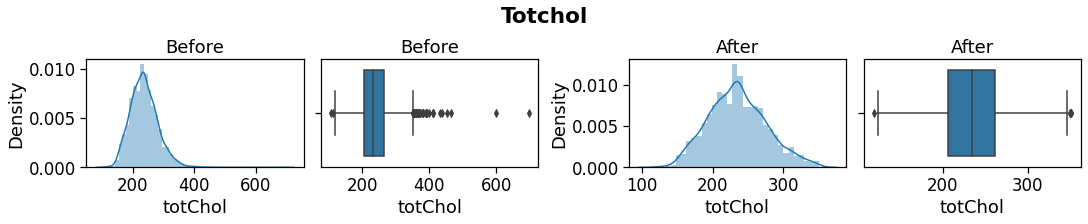

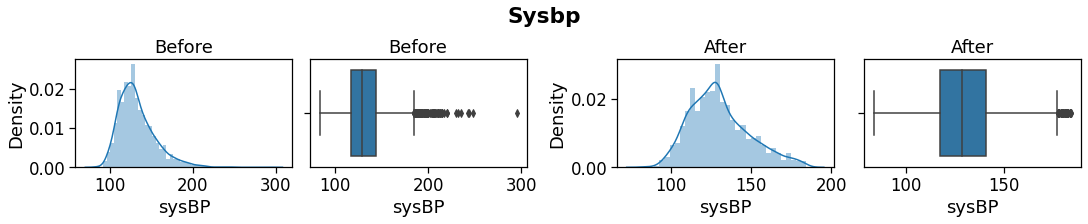

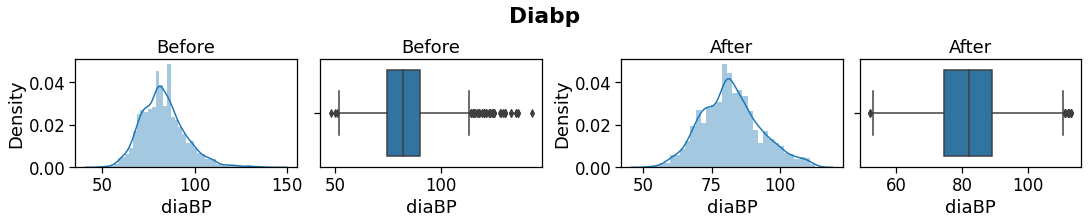

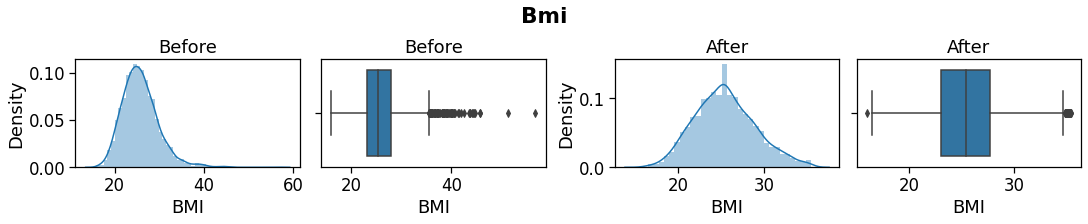

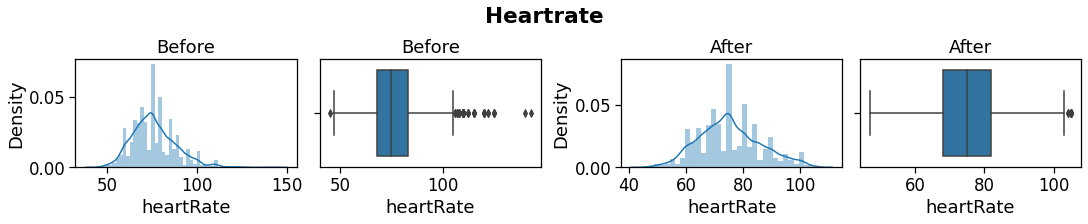

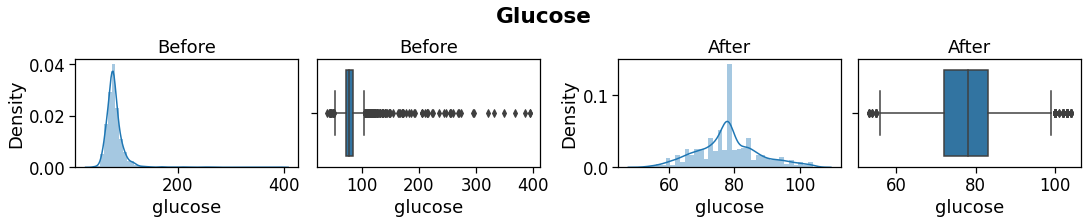

In [ ]:
# After treating outliers :

for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")


  # After treating outliers :
  
  sns.distplot(pk1[col], ax=ax[2]).set(title="After")
  sns.boxplot(pk1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## ***4. Data Vizualization, EDA, Understand the relationships between variables***

## **Univariate Analysis**

In [ ]:
# Lets check the discrete and continuous features

categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


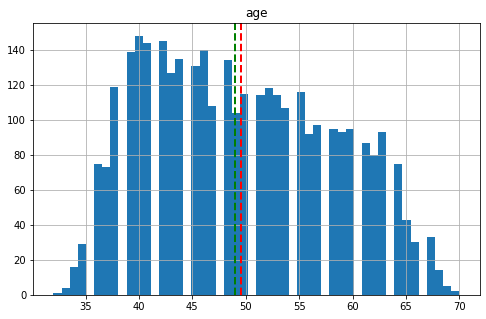

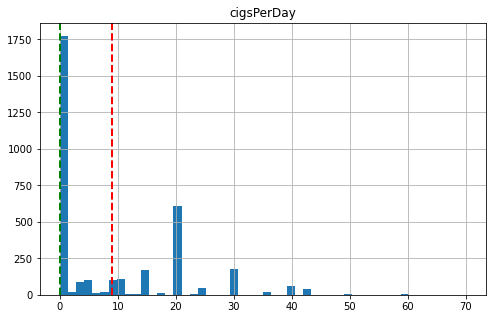

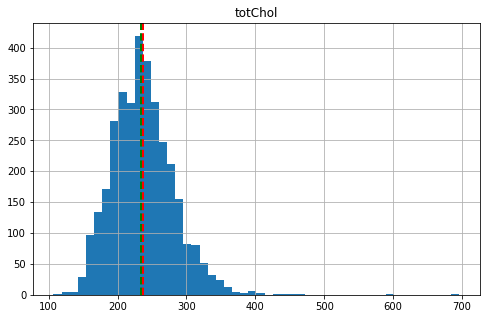

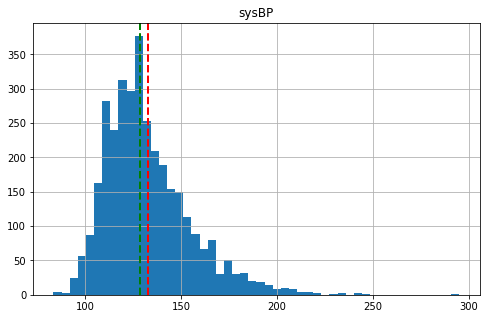

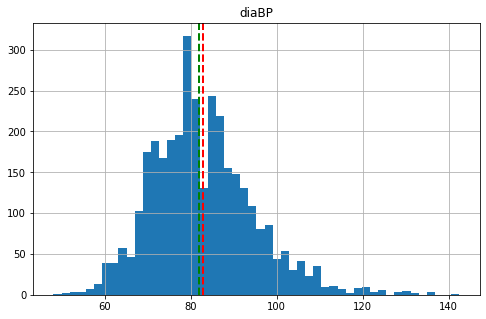

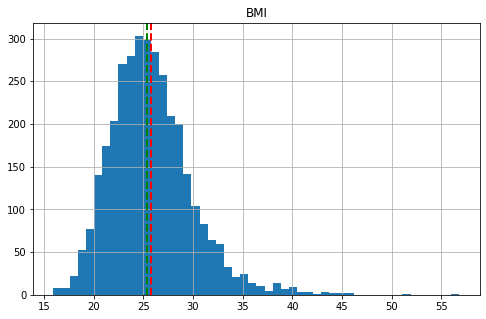

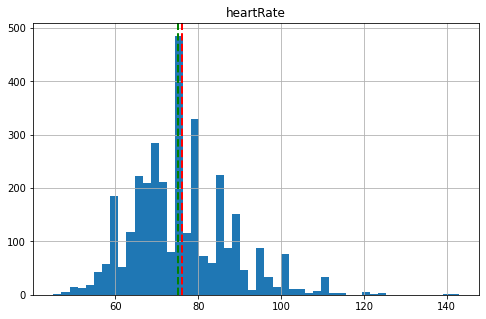

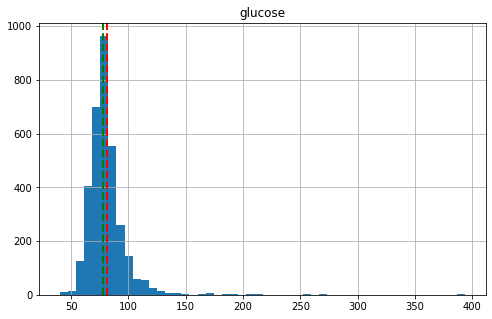

In [ ]:
# plot a bar plot for each numerical feature

for col in numeric_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

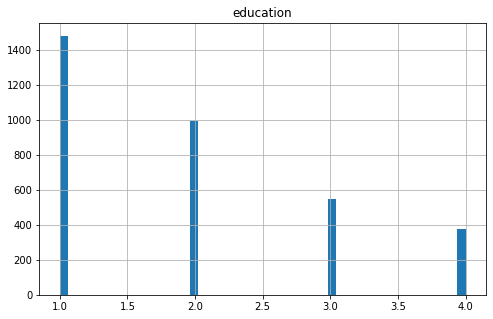

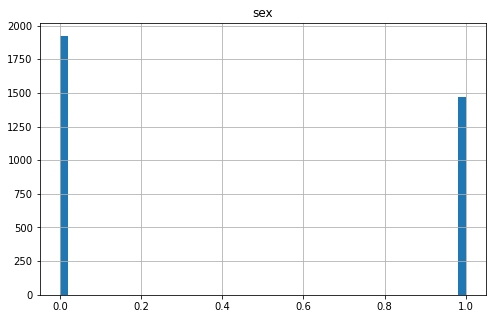

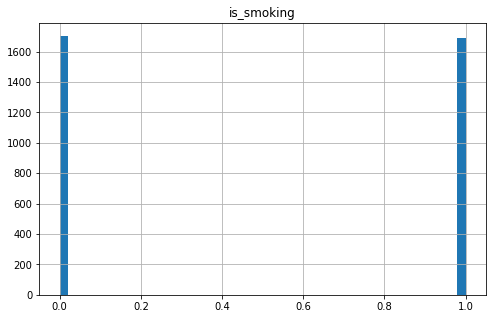

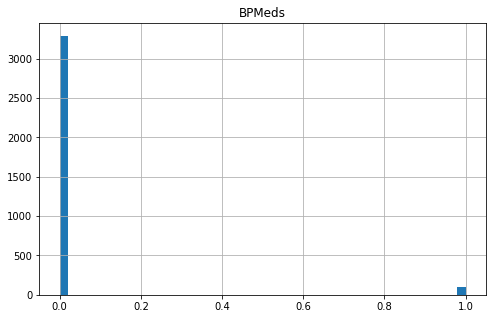

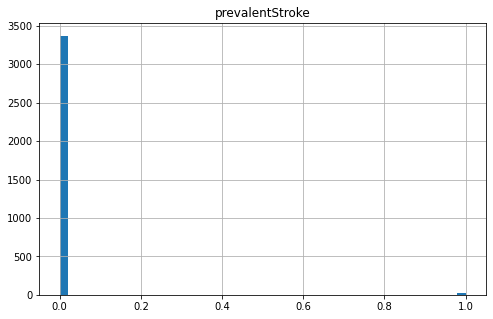

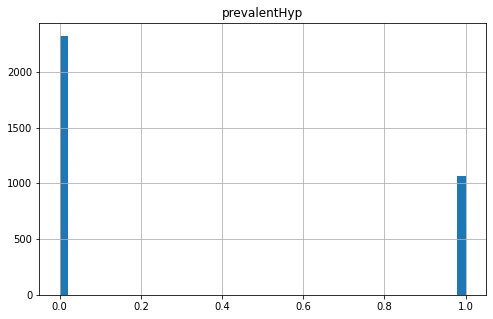

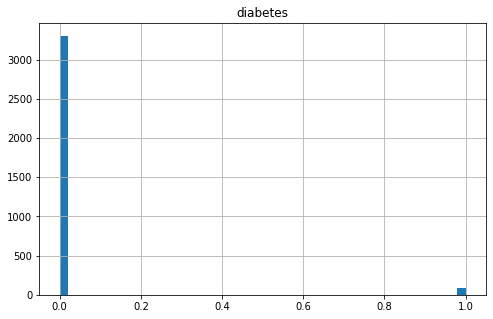

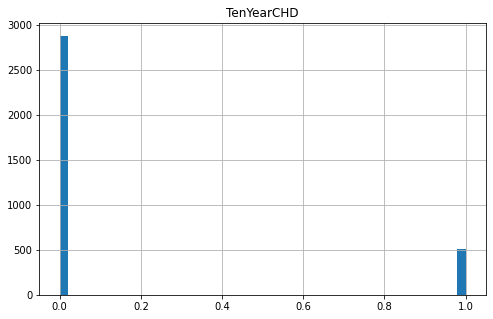

In [ ]:
# plot a bar plot for each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

- People in our dataset are divided into four levels in education - 1, 2 ,3 and 4
- Females are more compared to males in our dataset.
- Number of smokers and non-smokers are Approx equal.
- Only few people on BP medication are there in our dataset.
- A few people had a stroke in the past.
- A few people had diabates.


## **Bivariate Analysis**

#### **Categorical Columns**

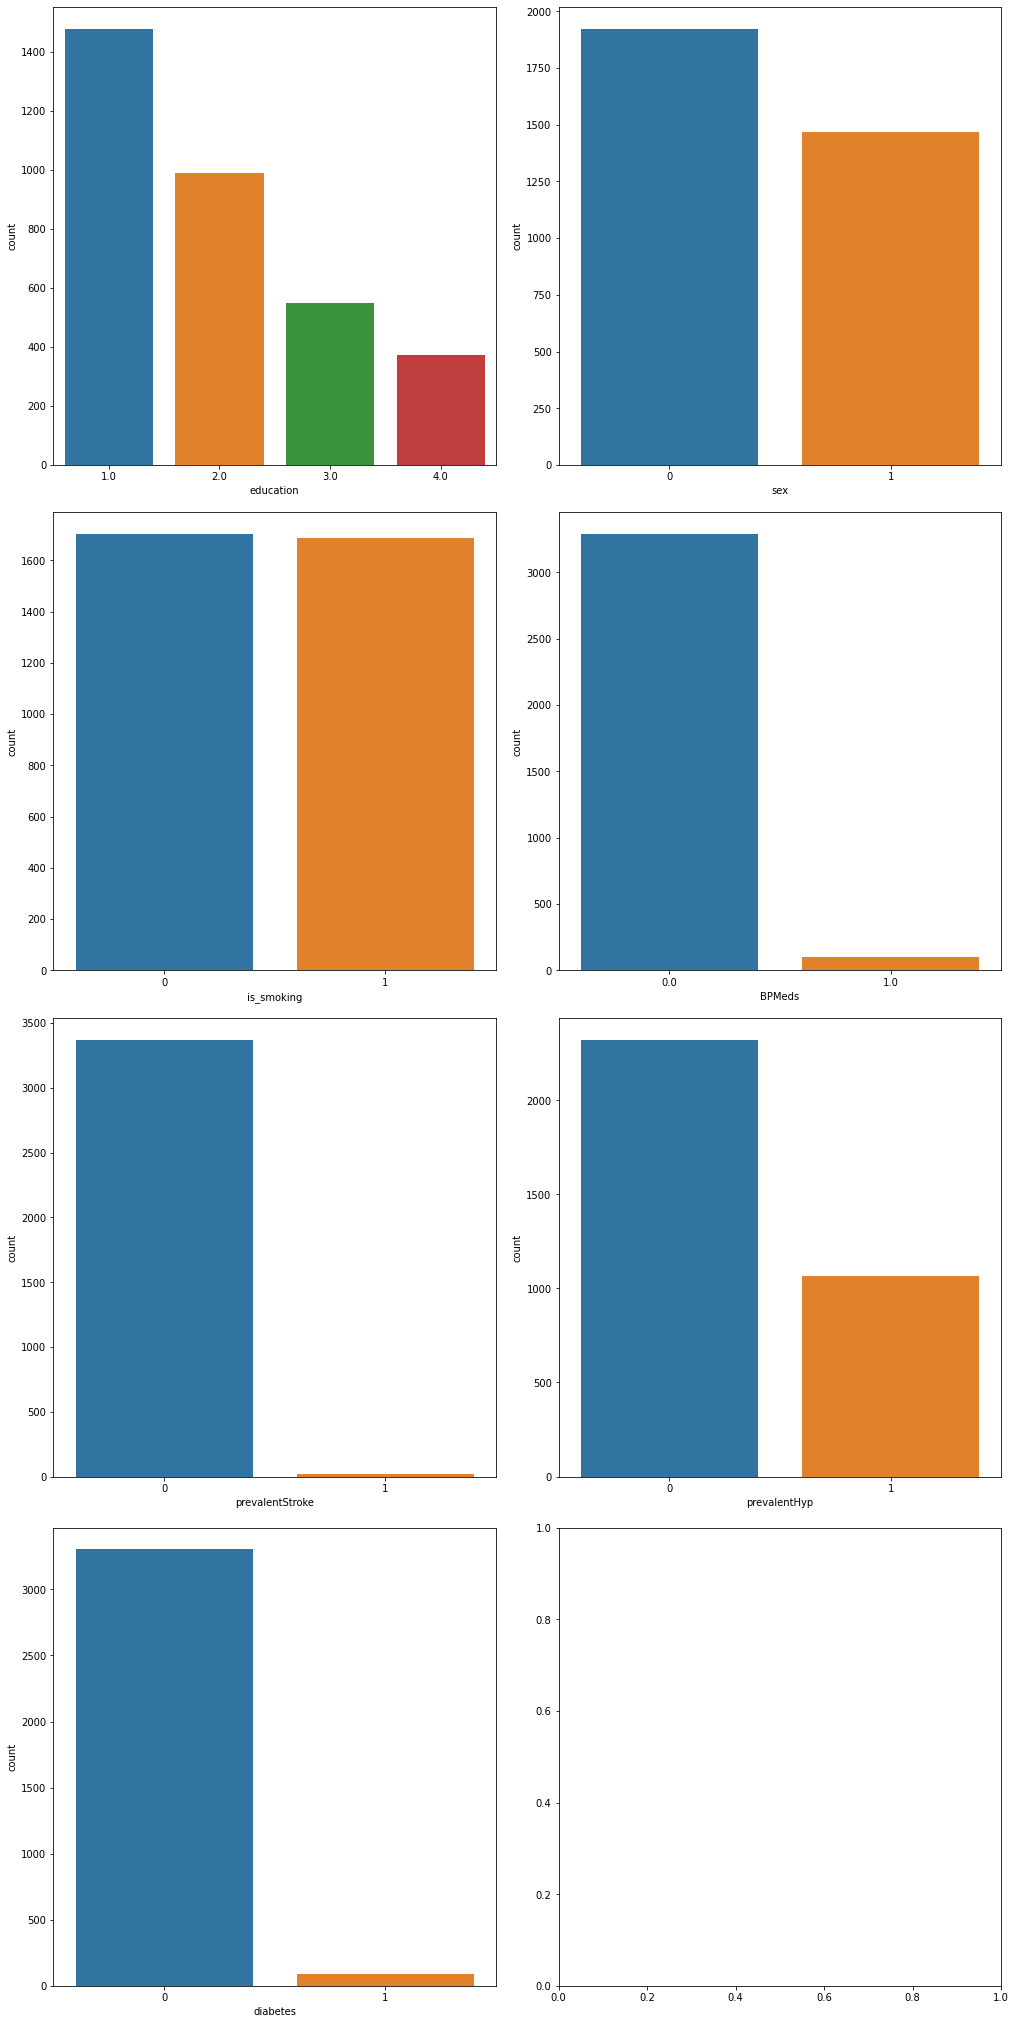

In [ ]:
#plotting for categorical columns

num_plots = len(categorical_columns)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_columns):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

Number of people who were not on BPmeds, who did not had a stroke in past, and who are dont have diastolic blood pressure are very less.

In [ ]:
# plotting age & sex vs risk

In [ ]:
at_risk = "At risk"
no_risk= "No risk"

Text(0.5, 1.0, 'Male')

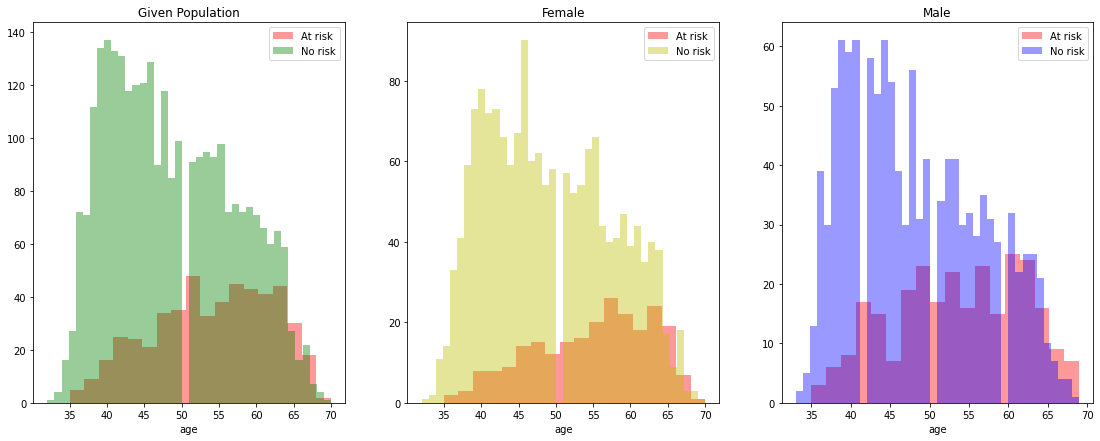

In [ ]:
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(19,7))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='y',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='b',kde=False)
ax.legend()
ax.set_title("Male")

- Both sexes, in Age group of 50 and above have high risk of heart disease.
- Men above 45 years are usually at risk, where as women above 55 years are usually at risk.
- Men are more likely to have heart disease compared to women.

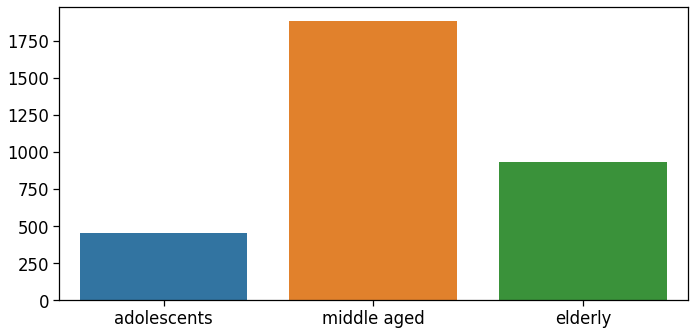

In [ ]:
#dividing the age into three section

Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['adolescents','middle aged','elderly'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Count of Middle aged people are highest followed by elderly.

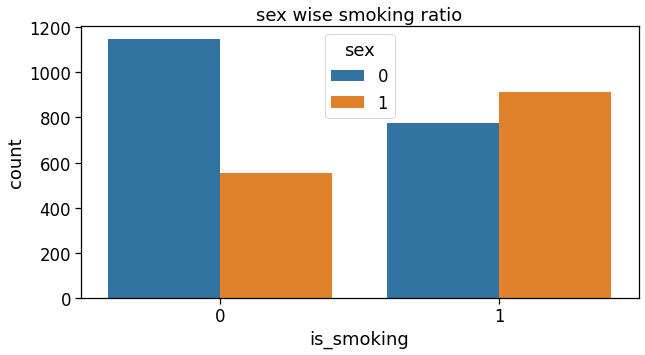

In [ ]:
# males and females smoker
plt.figure(figsize=(10,5))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

Number of male smokers is higher than female smokers

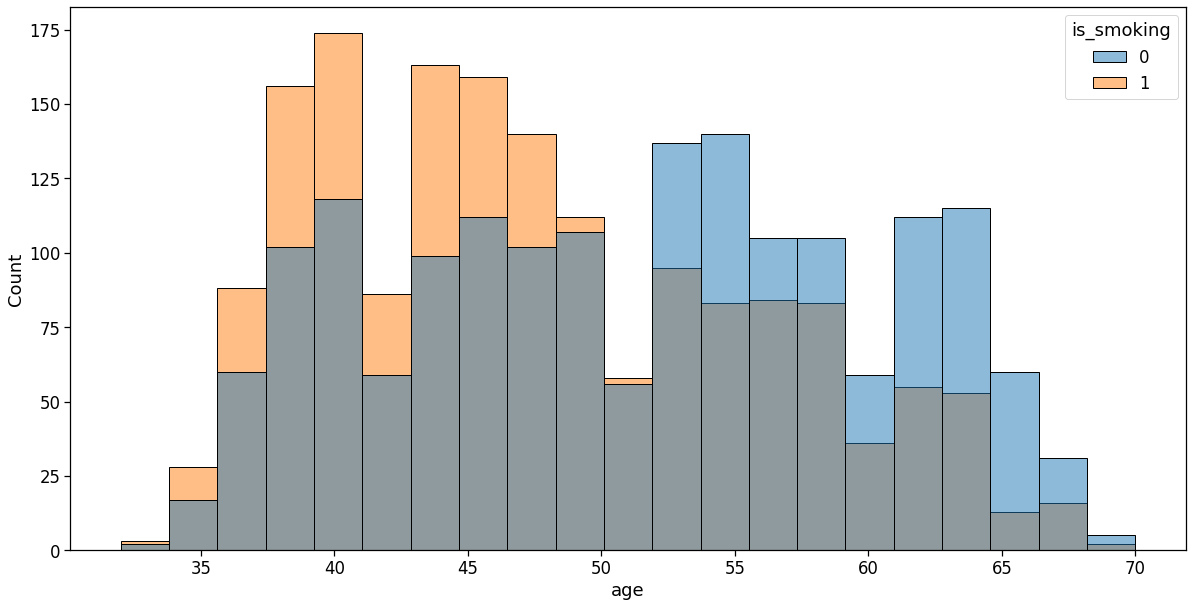

In [ ]:
#age wise smoking ratio

plt.figure(figsize=(20,10), facecolor='w')
sns.histplot(x="age",data=df,hue="is_smoking")

Number of smokers between the age group of 35 to 50 is highest i.e. Young and middle aged

Text(0.5, 1.0, 'NonSmokers')

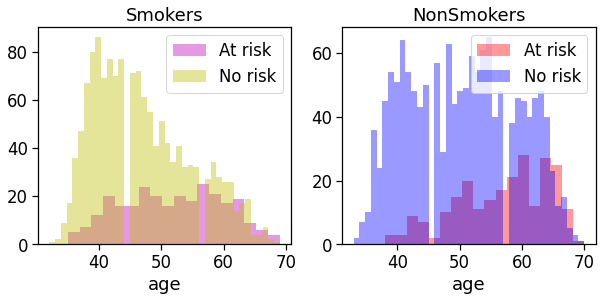

In [ ]:
# age and smoking vs risks

smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='m',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='y',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='b',kde=False)
ax.legend()
ax.set_title("NonSmokers")

Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.

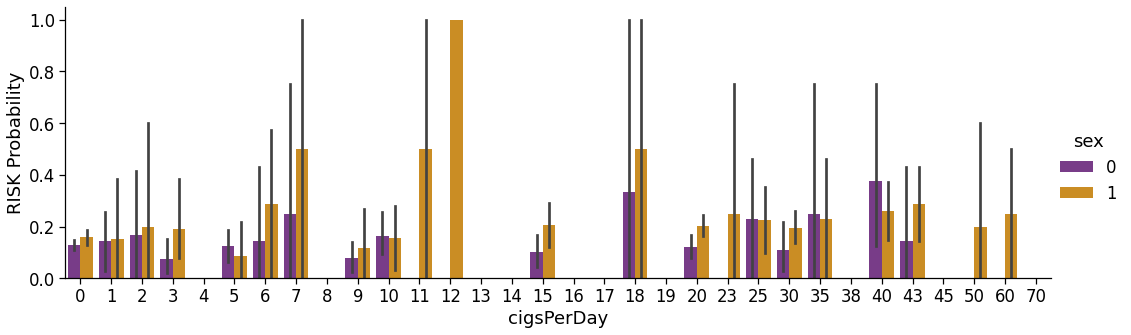

In [ ]:
# CigsPerDay & Sex vs Risk

df['cigsPerDay']=df['cigsPerDay'].astype(int)
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="CMRmap")
g=g.set_ylabels("RISK Probability")

Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers

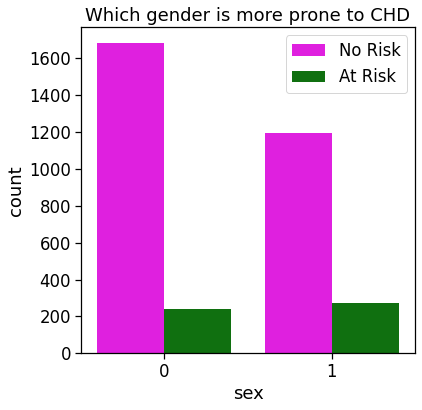

In [ ]:
# plotting genderwise
my_palette = {0 : 'magenta' , 1 : 'green'}
plt.figure(figsize = (6,6))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

The number of males and females which are at risk of CHD is equal.

The number of females who are not at risk is higher than that of male

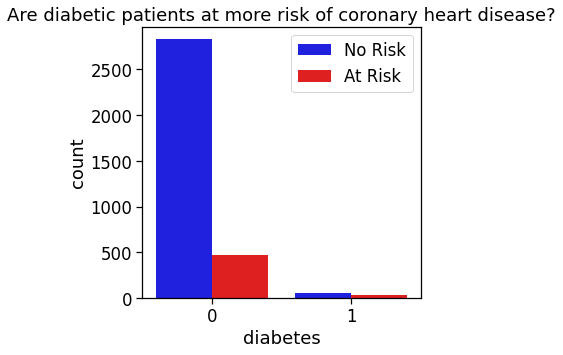

In [ ]:
# diabetes vs heart disease 

my_palette = {0 : 'blue' , 1 : 'red'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

Diabetic patients are at more risk of CHD.

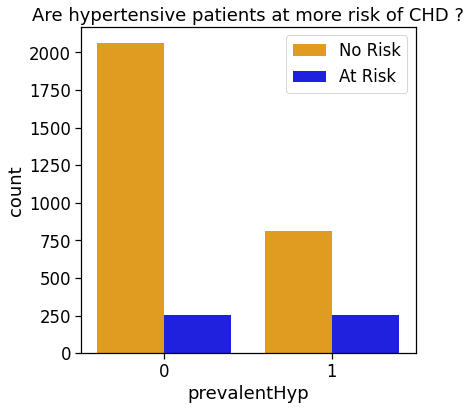

In [ ]:
# hypersensitivity vs risk

plt.figure(figsize = (6,6))
my_palette = {0 : 'orange' , 1 : 'blue'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

Out of all the people who are not Hypertensive, the number of people getting CHD is very less.
People who are hypertensive has more chances of getting CHD.

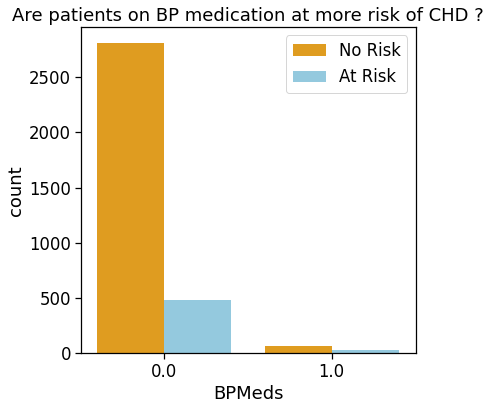

In [ ]:
# patients with blood pressure on medication vs risk factor

my_palette = {0 : 'orange' , 1 : 'skyblue'}
plt.figure(figsize = (6,6))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

Patients on BP medication are more prone to CHD where as those who are not on BP medication has severely less chances of getting CHD.

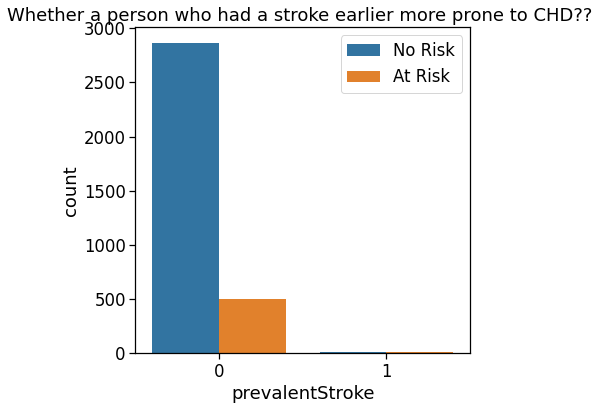

In [ ]:
# had a stroke earlier vs risk factor

plt.figure(figsize = (6,6))
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

The person who previously had a heart stroke are more at risk to CHD than those who did not

## **Multivariate Analysis**

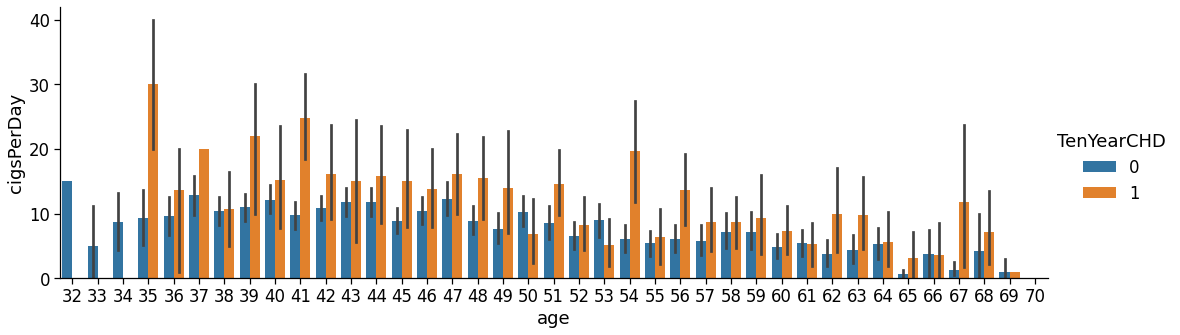

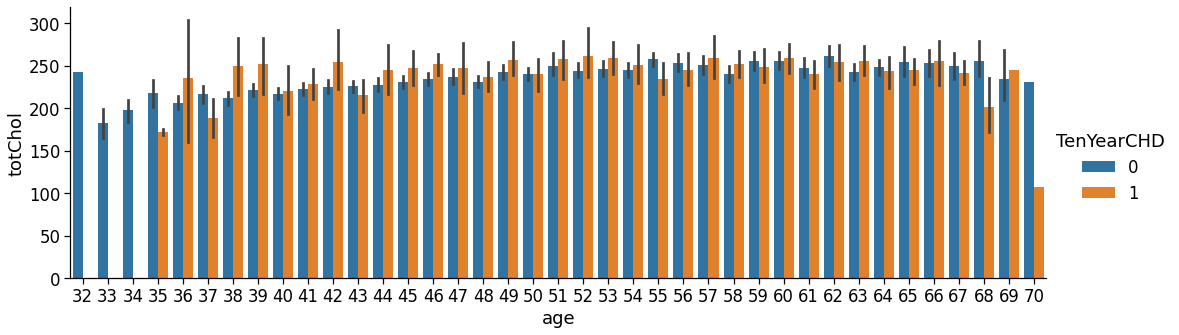

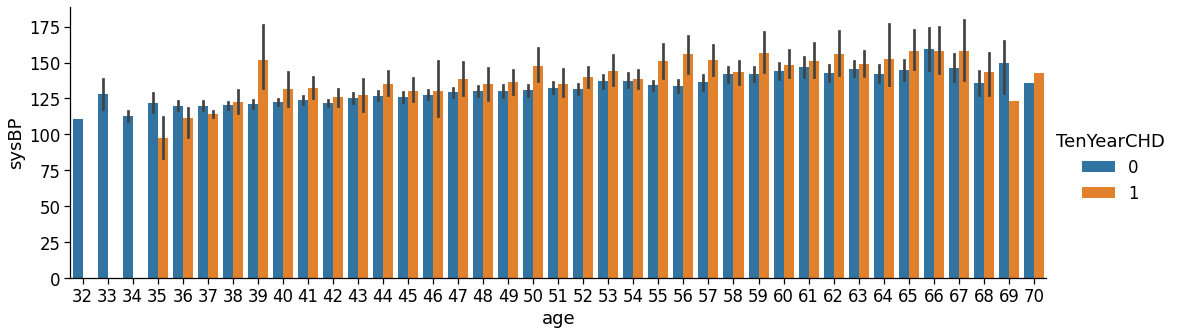

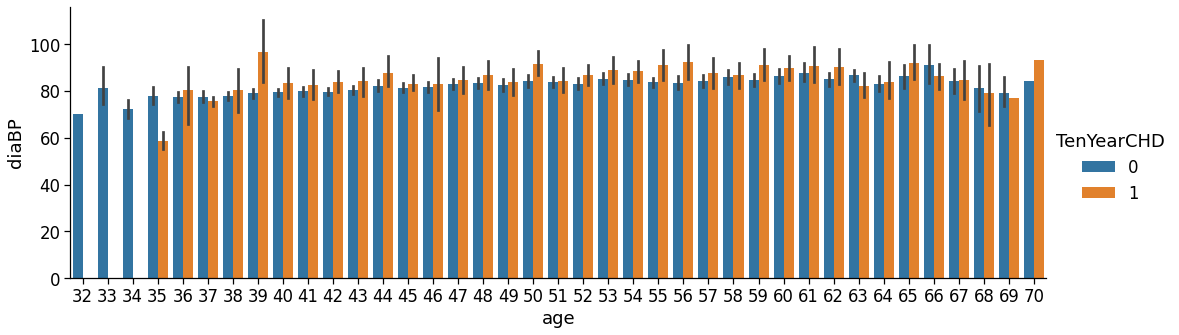

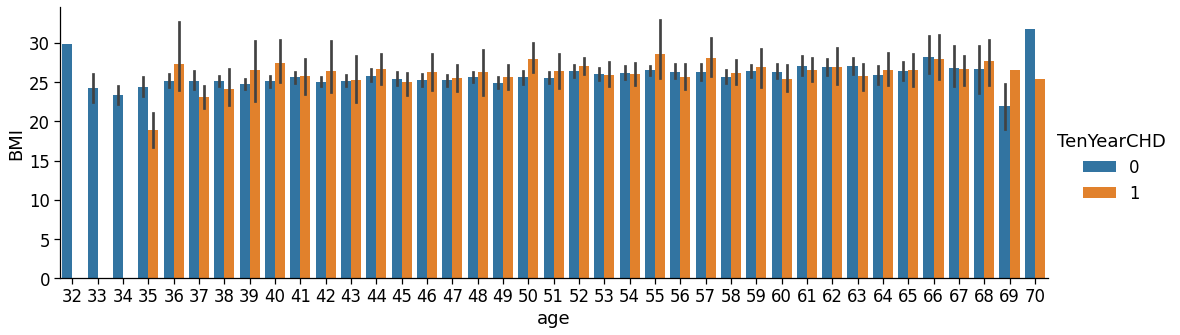

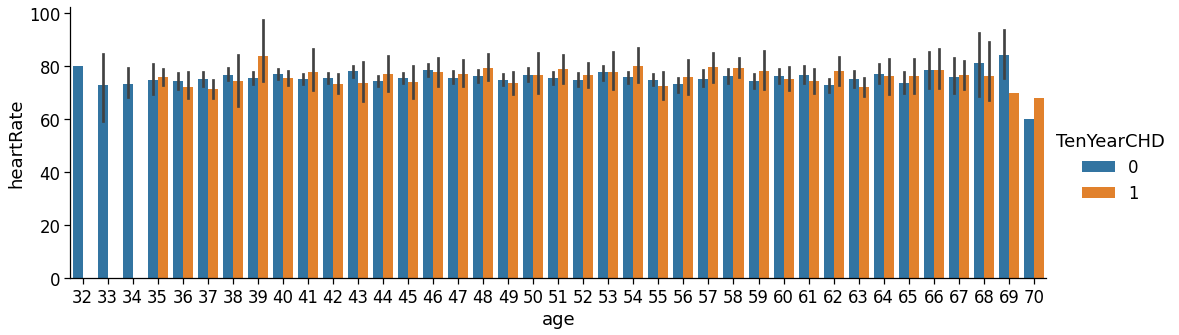

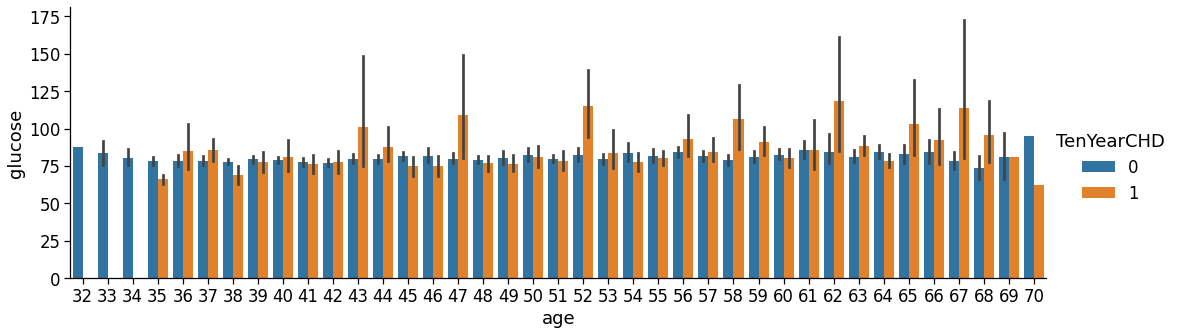

In [ ]:
# age and cvr with other numerical values

for i in numerical_columns:
  if i!='age':
    sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=df,height=5, aspect=3)

(1) The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.

(2) The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.

(3) If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR

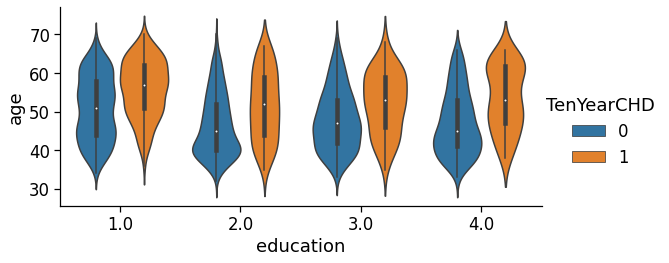

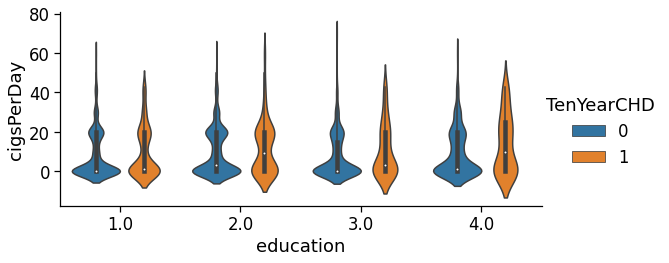

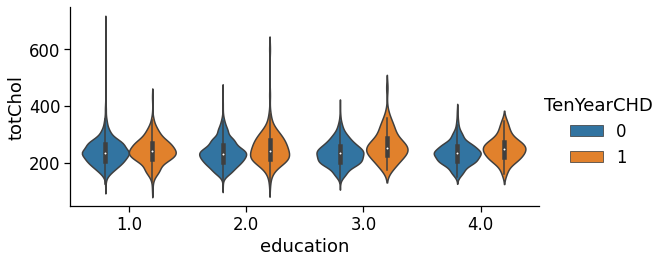

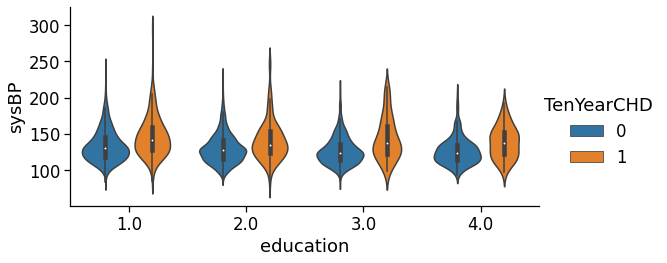

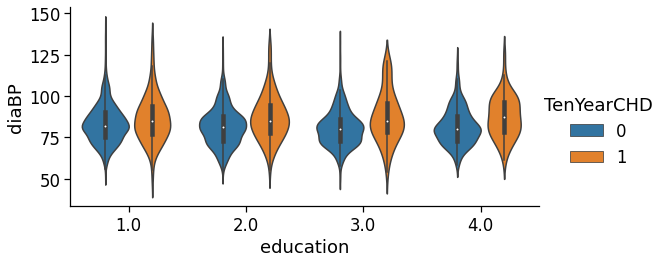

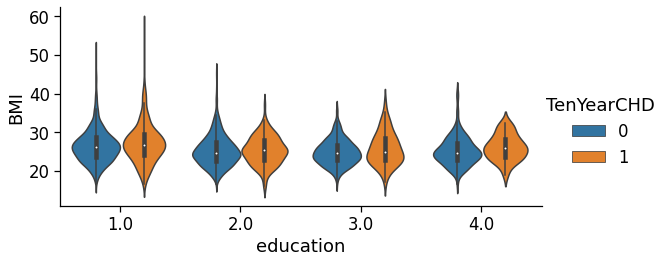

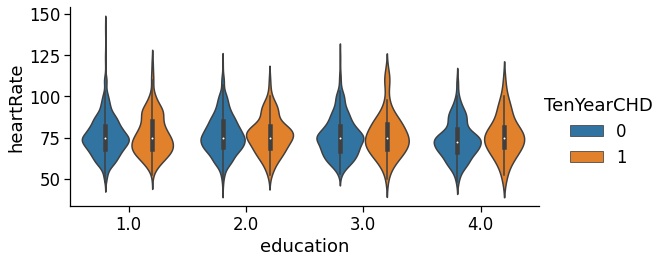

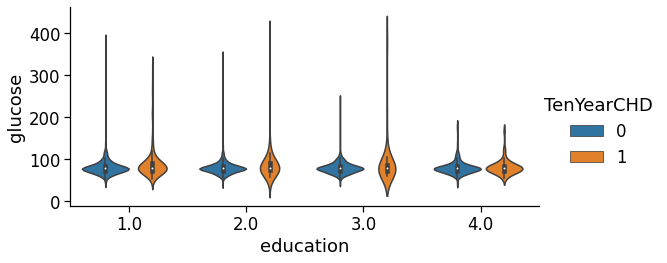

In [ ]:
# Education and CVR vs other numerical columns

for i in numerical_columns:
  sns.catplot(x="education", y=i, hue="TenYearCHD", kind="violin", data=df,height=4, aspect=2)

(1) The people who had the basic level education are at more risk of CVR when we compare the levels of education.

(2) Cholestrol level is high for fewer people in education level 2. But people who had basic education were at more risk of CVR.

(3) People with only the basic education are having more BP(considering sysBP,diaBP together), heartrate and BMI as well. So they are directly at more risk of CVR.

(4) People with the highest education (Education 4) are having controlled balanced glucose level. But other fewer people with other education levels are having very high cholestrol. We cna see a peak in glucose level in education leval 3 group peopl

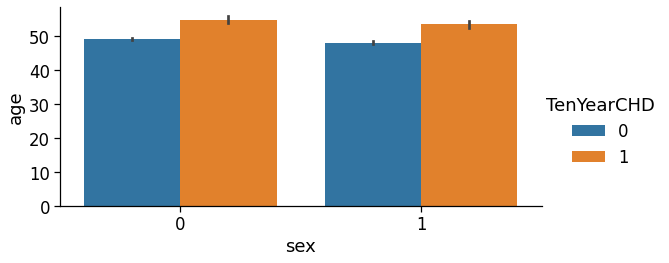

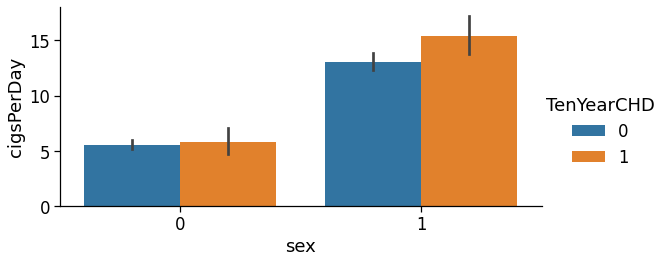

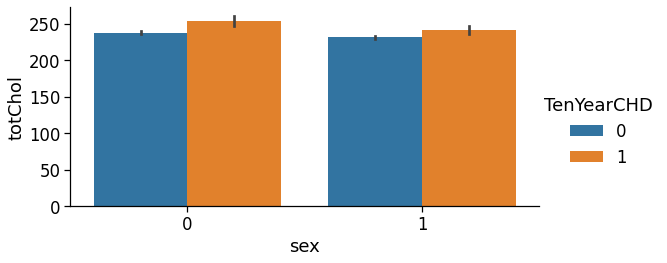

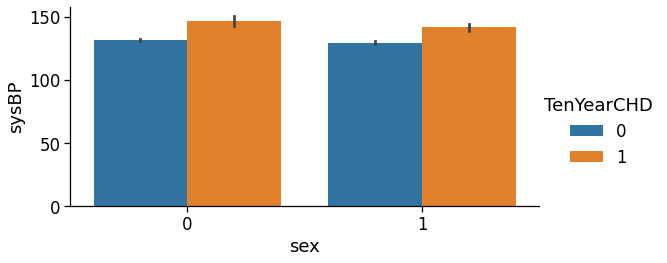

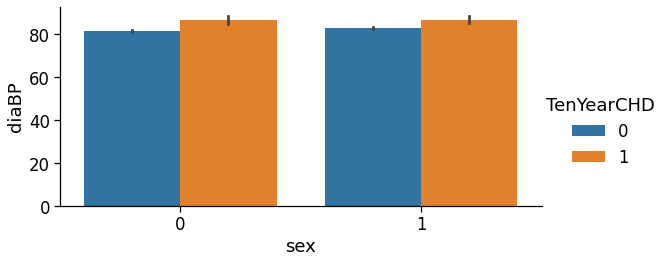

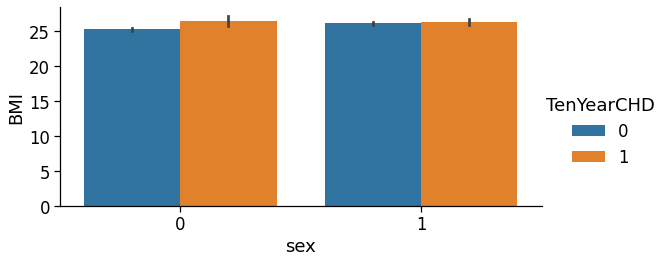

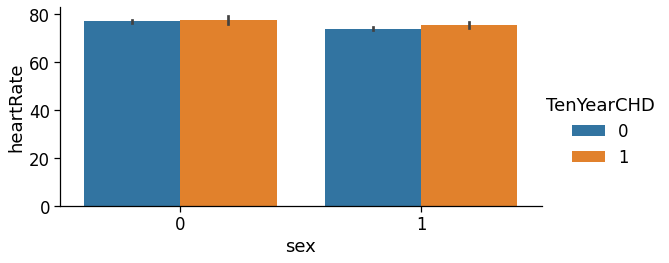

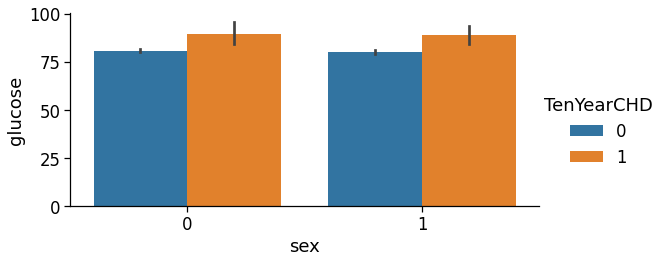

In [ ]:
# Sex and CVR vs other numerical columns

for i in numerical_columns:
  sns.catplot(x="sex", y=i, hue="TenYearCHD", kind="bar", data=df,height=4, aspect=2)

(1) Females are having high BP, high heart rate, high BMI and even high values of glucose. But the females who are between the age group of 50-70 are at more risk of CVR.

(2) Males between the age group 40-70 are at more risk of CVR.

(3)Whoever had the highest glucose level amongst men all comes under the risk of CVR.

(4) We can see that some of the highest cholestrol values are obtained by men (alone). This might be the reason that they are at high risk of CVR.

(5) But many men maintained normal range of BP, heartrate and BMI.

Text(0.5, 0, 'Numerical variables')

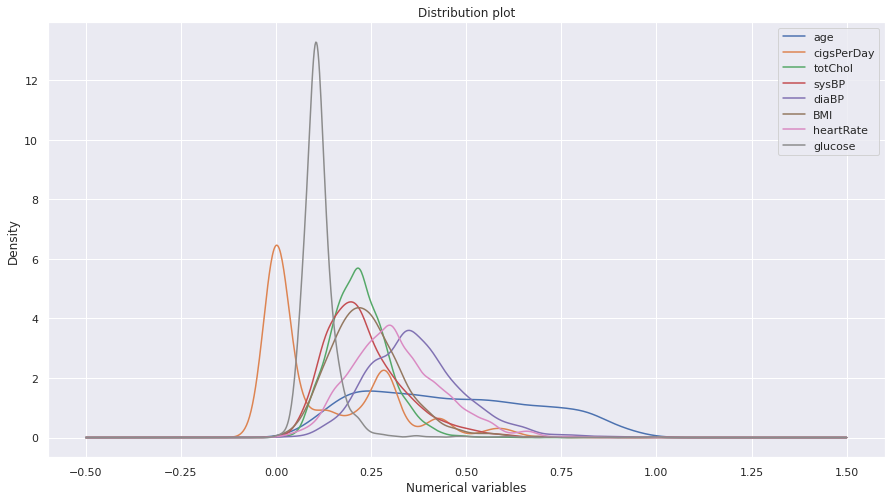

In [ ]:
# Distribution plot of all numerical variables
from sklearn.preprocessing import MinMaxScaler
# Min max scaler
column_names = numerical_columns

# taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
# using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_columns])
cardio_2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

We can observe that there are many people with high level of glucose followed by cholestrol. It might be that the lifestyle of people are contributing more to these values. So we observe some peaks in these vlaues

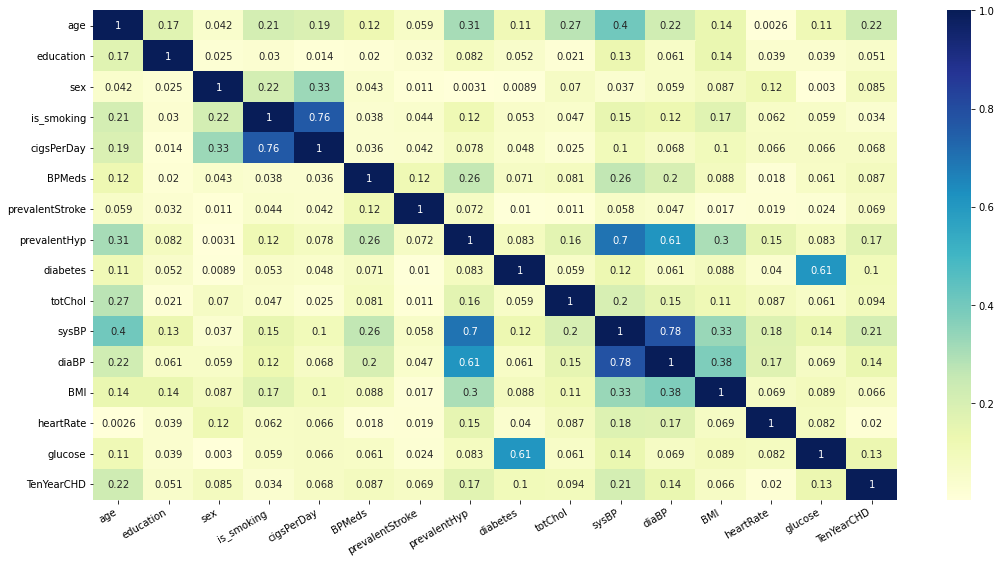

In [ ]:
# Correlation Heatmap visualization 

plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='YlGnBu')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

- sysBP and diaBP show the strongest positive correlation 
- is_smoking and cigsPerDay are positively co-related
- diabetes and glucose are positively co-related
- Correlation of diabetes with glucose and prevalentHyp with diaBP is equal

In [ ]:
# Pair Plot visualization code

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.